In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import random
import os
from scipy.stats import norm

individual01 var_sim var_data
VR: 2.3331123815312136 1.750532544378698
SS: 0.018361576874907828 0.06237063820018366
ANX: 0.4672924793434298 0.5134971533516989
INT: 0.17319992075415416 0.18969283746556473
individual02 var_sim var_data
VR: 1.630651550713804 1.2792104741122794
SS: 0.1767794283272274 0.35393632215830195
ANX: 0.23343500689964036 0.16060444356278517
INT: 0.13544869331180084 0.10433727435032733
individual03 var_sim var_data
VR: 3.230035292139017 1.9469822485207104
SS: 0.03399750660841744 0.12152050173010383
ANX: 0.22481871743757878 0.3834037197231834
INT: 0.2907765488961991 0.3343583693771626
individual04 var_sim var_data
VR: 0.4213226021218 0.43295847750865063
SS: 0.31275202814903763 0.42497128027681663
ANX: 1.0162906751586913 0.9955706747404842
INT: 0.46228823702437816 0.5662160034602077
individual05 var_sim var_data
VR: 1.882694422344944 1.434240362811792
SS: 0.05815727922461736 0.13961894683799447
ANX: 0.07744210464696206 0.21691630133534898
INT: 0.09332351390673355 0.226

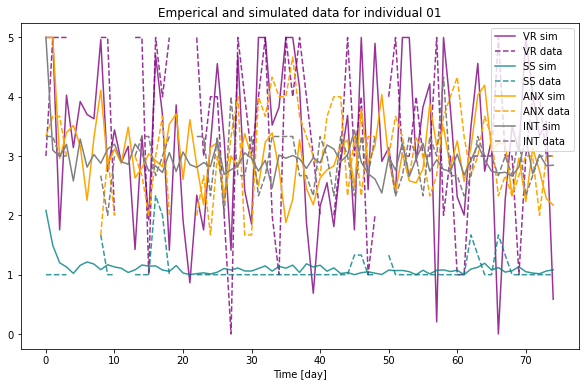

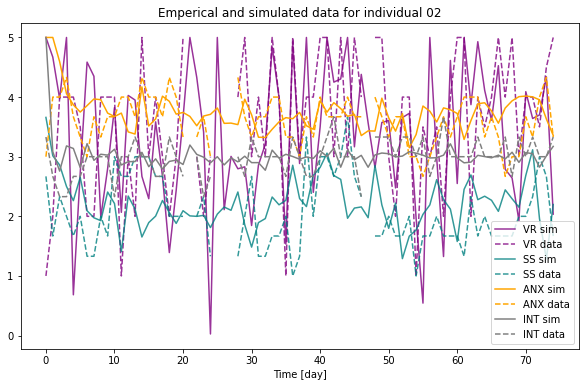

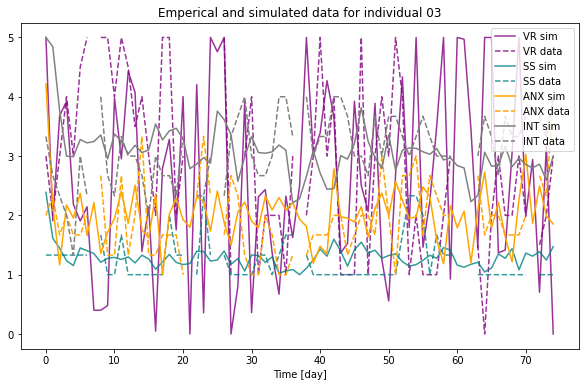

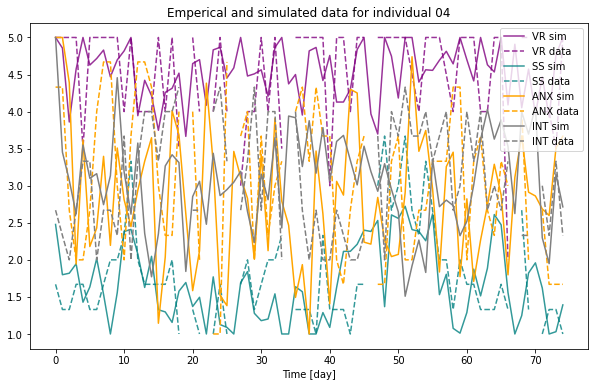

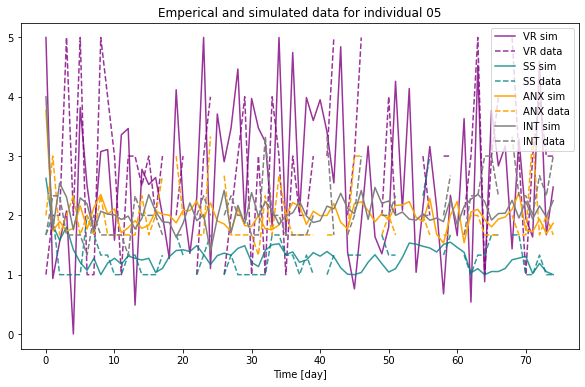

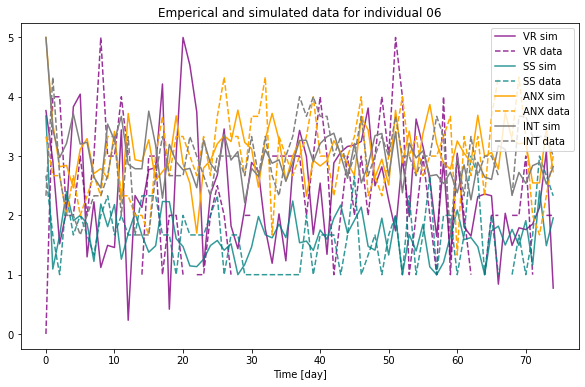

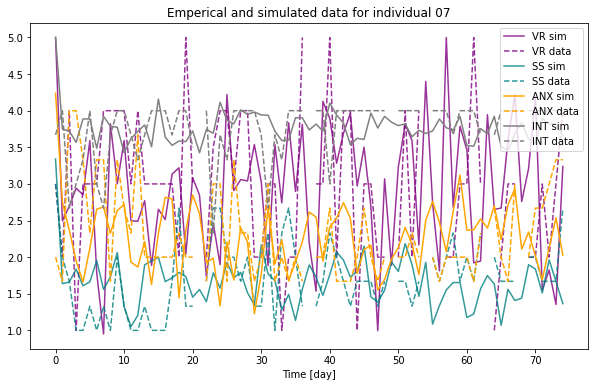

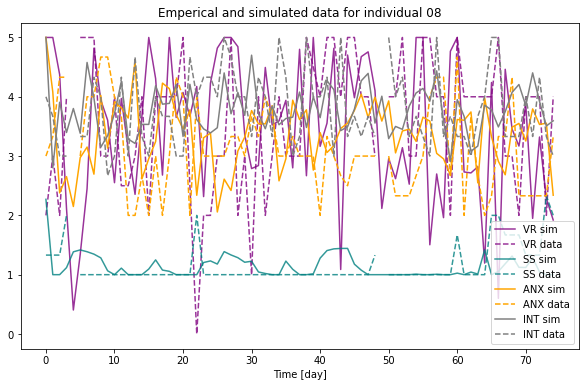

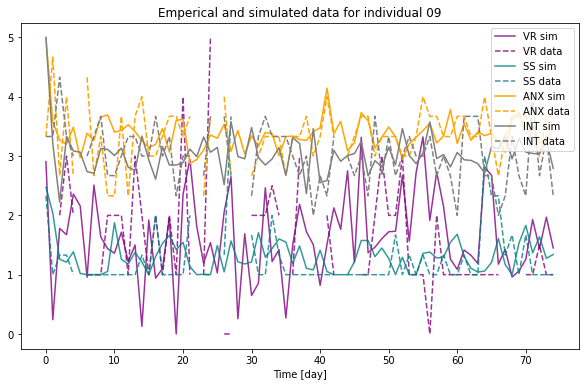

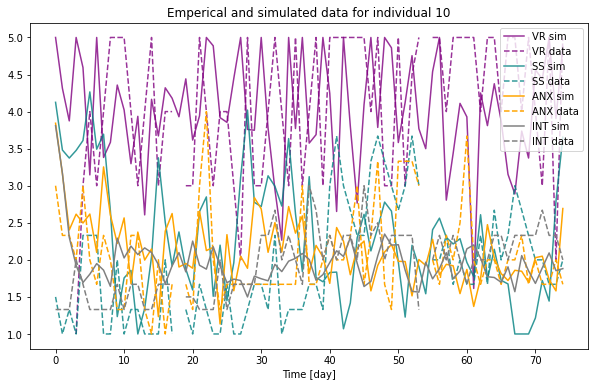

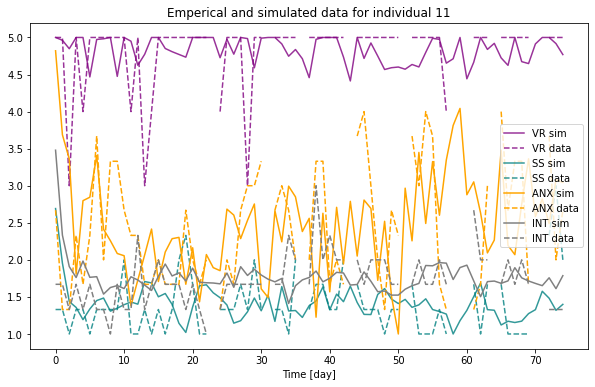

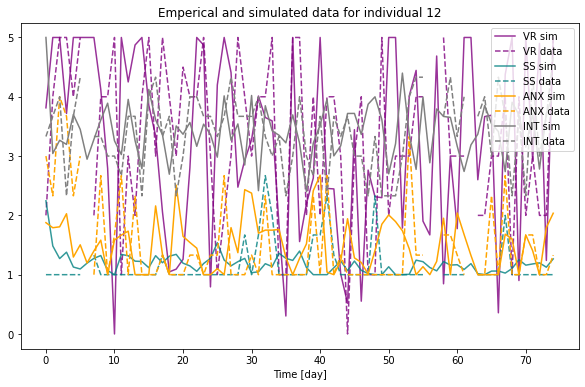

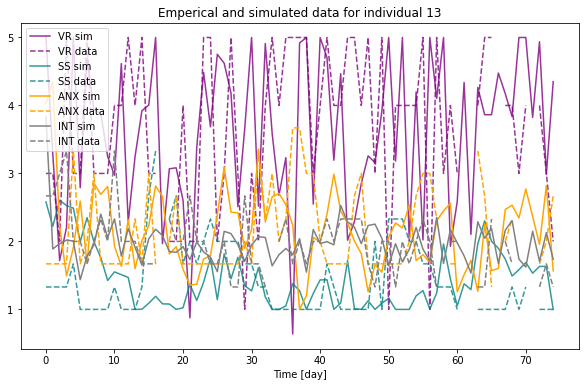

In [2]:
dir="GIMME analyses/Cleaned GIMME Data/"
numbers = ['01','02','03','04','05','06','07','08','09','10','11','12','13']

for batch in range(1,11): #10 sets of simulated data
    for num in numbers:
        data = np.loadtxt(dir+'Control_group_output/individual/'+'10'+num+'Betas.csv', skiprows=1, usecols=range(1,9), delimiter=',')
        A = data[:,4:] #same day beta values, (4x4)
        B = data[:,:4] #lagged beta values
        VR, SS, ANX, INT = np.genfromtxt(dir+'Control_Group/10'+num+'.txt', skip_header=1, unpack=True)
        length=75

        var_vr, mean_vr = np.nanvar(VR), np.nanmean(VR)  
        var_ss, mean_ss = np.nanvar(SS), np.nanmean(SS)
        var_anx, mean_anx = np.nanvar(ANX), np.nanmean(ANX)
        var_int, mean_int = np.nanvar(INT), np.nanmean(INT)
        
        M = np.zeros((length,4))
        t = np.arange(0,length) 
        #pick our starting M
        C = np.array([var_vr, var_ss,var_anx,var_int])
        M[0,:] = np.array([mean_vr, mean_ss, mean_anx, mean_int])+ np.random.randn(4)*C
        # Compute our covariance matrix C from the std of the chains
#         print(C)
        # now for each day, we compute the matrix multiplication from the day before
        for r in range(1,np.shape(M)[0]):   
            M[r]=np.matmul(np.matmul(np.linalg.inv(np.eye(4)-A),B),M[r-1])     
            #+ np.matmul(np.linalg.inv(np.eye(4)-A),np.dot(np.random.randn(4),C)) + np.array([mean_vr, mean_ss, mean_anx, mean_int])
            M[r]+=np.random.randn(4)*C

        M[:,:]+=  np.array([mean_vr, mean_ss, mean_anx, mean_int])
        np.savetxt('set '+str(batch)+' individual 10'+num, M, delimiter=',', header='VR,SS,ANX,INT', comments='')
#         print(M[0,1])
        
        if batch == 1: 
            print('individual' + num, 'var_sim', 'var_data')
            print('VR:', np.var(M[:,0]),var_vr)
            print('SS:', np.var(M[:,1]),var_ss)
            print('ANX:', np.var(M[:,2]),var_anx)
            print('INT:', np.var(M[:,3]),var_int)

        #clipping VR (0-5)
        indices = np.where(M[:,0]<0)[0]
        M[indices,0] = 0
        indices = np.where(M[:,0]>5)[0]
        M[indices,0] = 5

        for i in range(1,4):
        #clipping other variables (1-5)
            indices = np.where(M[:,i]<1)[0]
            M[indices,i] = 1
            indices = np.where(M[:,i]>5)[0]
            M[indices,i] = 5
        
        if batch == 1: 
            plt.figure(figsize=(10,6))

            plt.plot(t,M[:,0], color='purple',label='VR sim', alpha=0.8)
            plt.plot(t,VR,  color='purple',label='VR data', linestyle='--', alpha=0.8)
            plt.plot(t,M[:,1], color='teal',label='SS sim', alpha=0.8)
            plt.plot(t,SS, color='teal',label='SS data', linestyle='--', alpha=0.8)
            plt.plot(t,M[:,2], color='orange',label='ANX sim')
            plt.plot(t,ANX, color='orange',label='ANX data', linestyle='--')
            plt.plot(t,M[:,3], color='gray', label='INT sim')
            plt.plot(t,INT, color='gray', label='INT data', linestyle='--')
            plt.xlabel('Time [day]')
            plt.title('Emperical and simulated data for individual ' + num)
            leg=plt.legend()

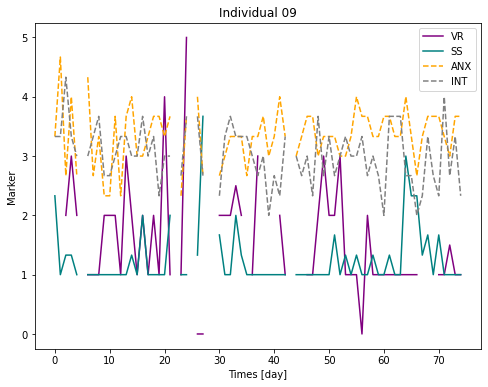

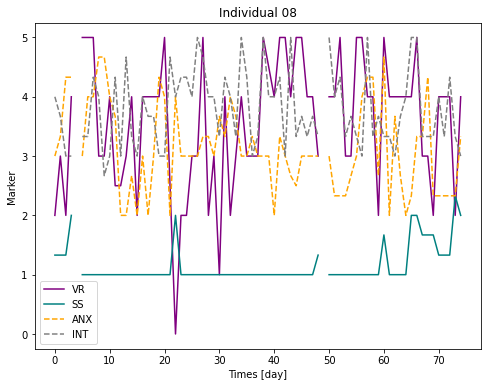

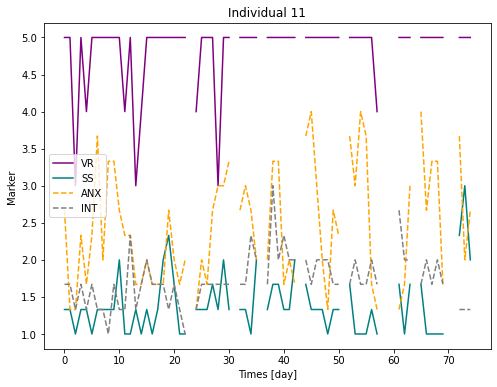

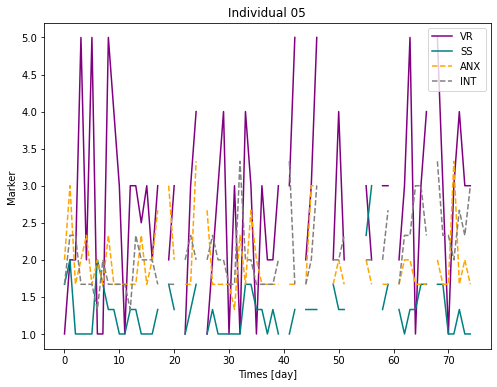

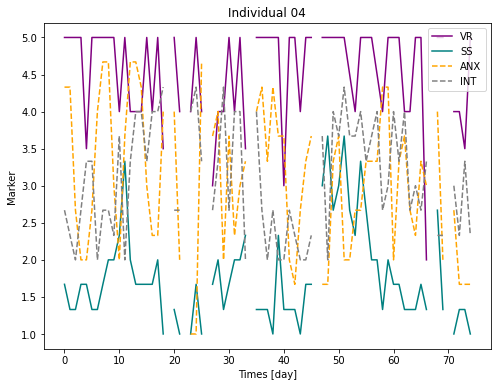

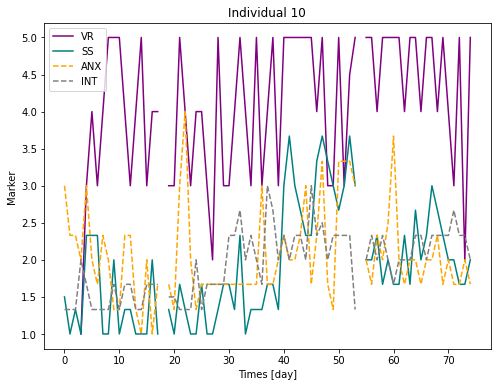

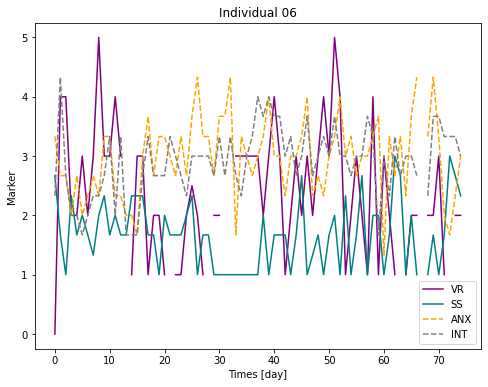

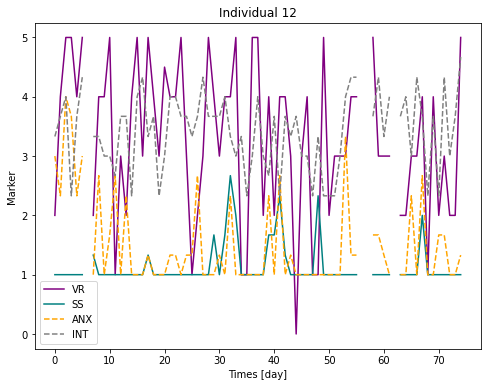

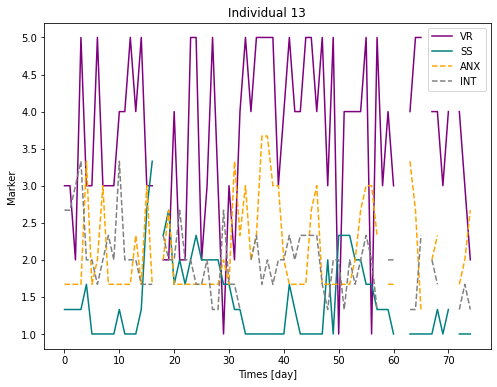

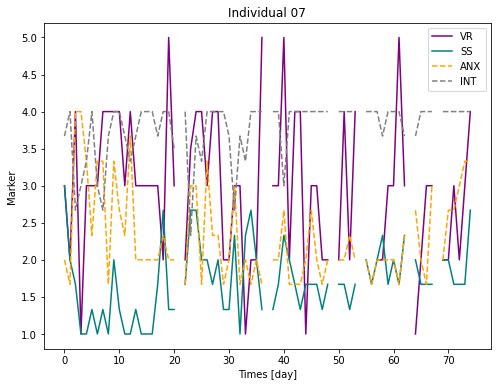

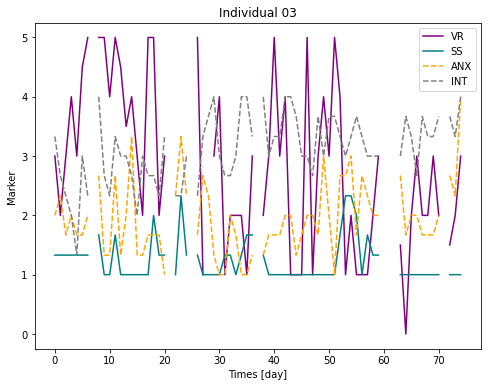

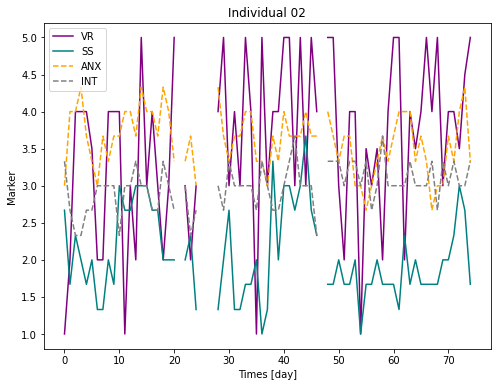

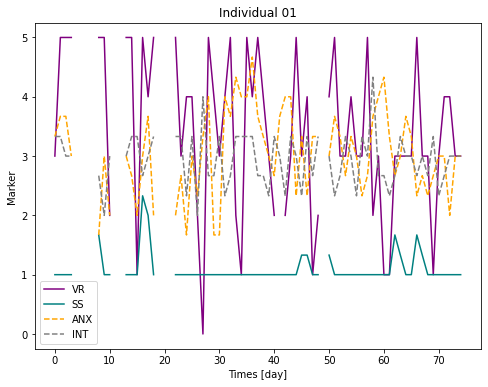

In [3]:
#Emperical data 

path = 'GIMME analyses/Cleaned GIMME Data/Control_Group'
for file in os.listdir(path): 
    VR, SS, ANX, INT = np.genfromtxt(path+'/'+file, skip_header=1, unpack=True) #'nan' values assigned 0? 
    plt.figure(figsize=(8,6))
    plt.plot(t, VR, label='VR', linestyle='-', color='purple')
    plt.plot(t, SS, label='SS', linestyle='-', color='teal')
    plt.plot(t, ANX, label='ANX', linestyle='--', color='orange')
    plt.plot(t, INT, label='INT', linestyle='--', color='gray')
    plt.legend()
    plt.xlabel('Times [day]')
    plt.ylabel('Marker')
    plt.title('Individual '+file[2:4])